<a href="https://colab.research.google.com/github/pedrohrnqsantos/DS_studies/blob/main/Analise_Dados_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Analise de Dados com Pandas - *Pedro Santos*




## *Extraindo e Verificando e Analisando Dados com a biblioteca pandas e matplotlib*

In [3]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
pd.options.display.float_format = '{:20,.2f}'.format

In [4]:
#Upload de arquivos pelo google colab
from google.colab import files
arquivo = files.upload()

In [5]:
# criação do dataframe de estudo
df = pd.read_excel('AdventureWorks.xlsx')
df.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [6]:
# verificando dos tipos de dados
print("tipo de dados x coluna")
df.dtypes

tipo de dados x coluna


Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [7]:
# verificando NA values
print("tipos de dados x coluna x NA values")
df.info()

tipos de dados x coluna x NA values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Venda      904 non-null    datetime64[ns]
 1   Data Envio      904 non-null    datetime64[ns]
 2   ID Loja         904 non-null    int64         
 3   ID Produto      904 non-null    int64         
 4   ID Cliente      904 non-null    int64         
 5   No. Venda       904 non-null    object        
 6   Custo Unitário  904 non-null    float64       
 7   Preço Unitário  904 non-null    float64       
 8   Quantidade      904 non-null    int64         
 9   Valor Desconto  904 non-null    float64       
 10  Valor Venda     904 non-null    float64       
 11  Produto         904 non-null    object        
 12  Fabricante      904 non-null    object        
 13  Marca           904 non-null    object        
 14  Classe          904 no

In [8]:
# Verificação da quantidade de Linhas e Colunas
print("Numero de linhas: {}".format(df.shape[0]))
print("Numero de colunas: {}".format(df.shape[1]))

Numero de linhas: 904
Numero de colunas: 16


In [9]:
# Momento de referencia do estudo
print(f"Ano de Referencia {df['Data Venda'].dt.year.unique()}")

Ano de Referencia [2008 2009]


In [10]:
print(f"{df['Data Venda'].min()} | começa aqui") # começa quando
print(f"{df['Data Venda'].max()} | termina aqui") # termina quando 

2008-01-02 00:00:00 | começa aqui
2009-12-31 00:00:00 | termina aqui


In [11]:
# Criação da Coluna de Custo e Lucro
df['Valor Custo'] = df['Custo Unitário'].mul(df['Quantidade'])
df['Valor Lucro'] = df['Valor Venda'] - df['Custo Unitário']

## *Informativo dos Valores*

In [12]:
# Lucro total, Custo Total , Desconto Total , Venda Total
print(f"Lucro total: {round(df['Valor Lucro'].sum(),2)}")
print(f"Custo total: {round(df['Valor Custo'].sum(),2)}")
print(f"Desconto total: {round(df['Valor Desconto'].sum(),2)}")
print(f"Venda total: {round(df['Valor Venda'].sum(),2)}")

Lucro total: 5738712.58
Custo total: 2486783.05
Desconto total: 622967.46
Venda total: 5984606.14


In [13]:
# função de verificação por ano
def verifica_por_ano(dado):
  informa = df.groupby(df['Data Venda'].dt.year)[dado].sum().round(2) # valor por ano
  grafico = df.groupby(df['Data Venda'].dt.month)[dado].sum().round(2).plot.bar() # plot grafico
  return informa
  return grafico

Data Venda
2008           3,187,607.65
2009           2,796,998.49
Name: Valor Venda, dtype: float64


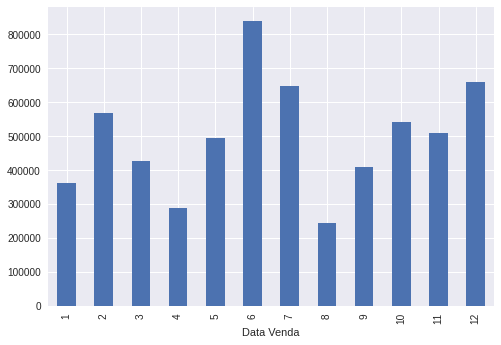

In [14]:
print(verifica_por_ano('Valor Venda')) # Venda por Ano | Gráfico por mês

Data Venda
2008             292,434.02
2009             330,533.44
Name: Valor Desconto, dtype: float64


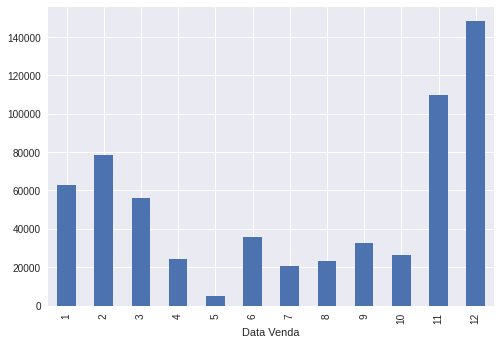

In [15]:
print(verifica_por_ano('Valor Desconto')) # Desconto por ano | Gráfico por mês

Data Venda
2008           1,267,529.94
2009           1,219,253.11
Name: Valor Custo, dtype: float64


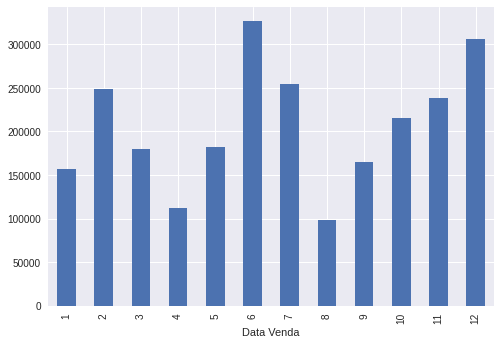

In [16]:
print(verifica_por_ano('Valor Custo')) # Custos por ano | Gráfico por mês

Data Venda
2008           3,057,443.12
2009           2,681,269.46
Name: Valor Lucro, dtype: float64


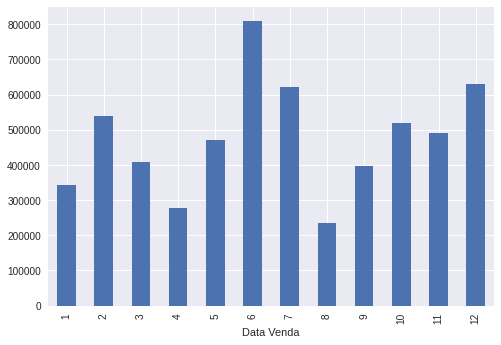

In [17]:
print(verifica_por_ano('Valor Lucro')) # Lucro por ano | Gráfico por mês

## *1. Encontrar tempo médio de envio por marca*

In [18]:
# Criando a coluna de tempo de envio
df['Tempo_Envio'] = df['Data Envio'] - df['Data Venda'] # data da venda - envio
print("tipo de dado: {}".format(df['Tempo_Envio'].dtypes),end="\n") # tipo de dado
df[['Tempo_Envio','Data Venda','Data Envio']].head(10) # consulta

tipo de dado: timedelta64[ns]


,Tempo_Envio,Data Venda,Data Envio
0,20 days,2008-05-09,2008-05-29
1,5 days,2008-05-12,2008-05-17
2,6 days,2008-05-14,2008-05-20
3,6 days,2008-05-21,2008-05-27
4,7 days,2008-06-20,2008-06-27
5,8 days,2008-07-12,2008-07-20
6,7 days,2008-08-14,2008-08-21
7,10 days,2008-09-29,2008-10-09
8,10 days,2008-10-09,2008-10-19
9,11 days,2008-10-16,2008-10-27


In [19]:
df['Tempo_Envio'] = (df['Data Envio'] - df['Data Venda']).dt.days # apenas numeros
df.dtypes['Tempo_Envio'] # Tempo_Envio tipo inteiro
df['Tempo_Envio'].head(3)

0    20
1     5
2     6
Name: Tempo_Envio, dtype: int64

In [20]:
# Média de tempo de envio por marca
print(f" Tempo médio de envio em dias \n{df.groupby('Marca')['Tempo_Envio'].mean()}")

 Tempo médio de envio em dias 
Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo_Envio, dtype: float64


## *2. Lucro por Marca*

In [21]:
# Lucro por Marca
df.groupby('Marca')['Valor Lucro'].sum()

Marca
Adventure Works           1,373,641.08
Contoso                     449,521.07
Fabrikam                  3,915,550.43
Name: Valor Lucro, dtype: float64

Data Venda  Marca          
2008        Adventure Works             587,248.06
            Contoso                     130,490.77
            Fabrikam                  2,339,704.29
2009        Adventure Works             786,393.02
            Contoso                     319,030.30
            Fabrikam                  1,575,846.14
Name: Valor Lucro, dtype: float64


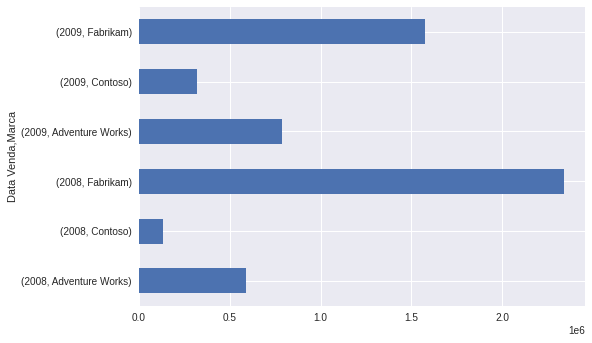

In [22]:
# Lucro por Marca e Ano
print(df.groupby([df['Data Venda'].dt.year, 'Marca'])['Valor Lucro'].sum())
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Valor Lucro'].sum().plot.barh()

## *3. Lucro por Produto*

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64


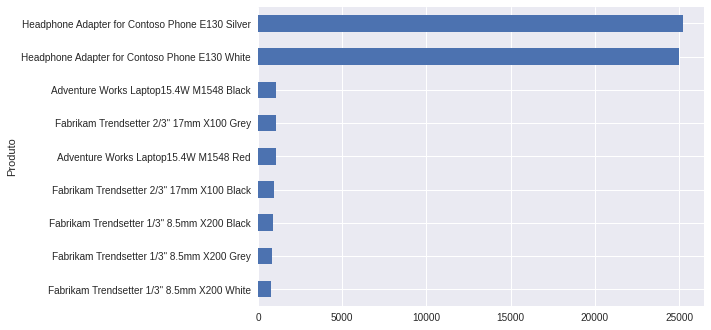

In [23]:
# Produto mais vendido
print(df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False))
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=True).plot.barh()

Produto
Fabrikam Trendsetter 2/3'' 17mm X100 Grey                   922,723.58
Fabrikam Trendsetter 2/3'' 17mm X100 Black                  787,953.73
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black                 770,351.28
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey                  750,252.16
Adventure Works Laptop15.4W M1548 Black                     703,913.84
Fabrikam Trendsetter 1/3'' 8.5mm X200 White                 684,269.68
Adventure Works Laptop15.4W M1548 Red                       669,727.24
Headphone Adapter for Contoso Phone E130 Silver             226,148.55
Headphone Adapter for Contoso Phone E130 White              223,372.52
Name: Valor Lucro, dtype: float64


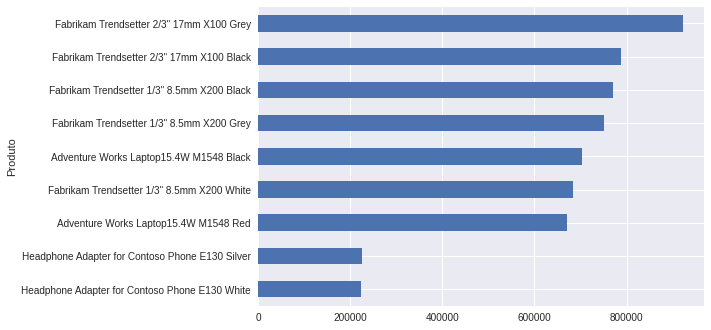

In [24]:
# Quais produtos deram mais lucro
print(df.groupby('Produto')['Valor Lucro'].sum().sort_values(ascending=False))
df.groupby('Produto')['Valor Lucro'].sum().sort_values(ascending=True).plot.barh()


## *4. Em qual momento teve mais vendas*

In [25]:
#separando os anos 2008 e 2009
df_2008 = df[df['Data Venda'].dt.year == 2008]
df_2009 = df[df['Data Venda'].dt.year == 2009]

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
2009 - verde
2008 - azul


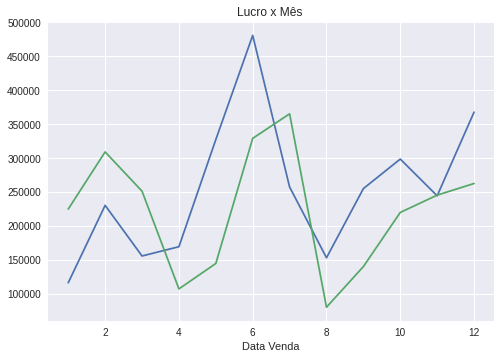

In [26]:
print(df_2008.groupby(df_2008['Data Venda'].dt.month)['Valor Lucro'].sum().plot(title='Lucro x Mês '))
print(df_2009.groupby(df_2009['Data Venda'].dt.month)['Valor Lucro'].sum().plot(title='Lucro x Mês '))
print('2009 - verde')
print('2008 - azul')